In [5]:
import os
from tqdm import tqdm
import numpy as np
from PIL import Image

In [ ]:
VOLUME_SLICES="C:/Users/Tmenova/personal/tum/thesis/initial-data/thyroid_compounded/volume_slices"

In [ ]:
SEGMENTATION_SLICES="C:/Users/Tmenova/personal/tum/thesis/initial-data/thyroid_compounded/segmentation_slices"

In [ ]:
patient_folders_volumes = os.listdir(VOLUME_SLICES)
patient_folders_segmentations = os.listdir(SEGMENTATION_SLICES)

In [ ]:
assert(patient_folders_volumes==patient_folders_segmentations)

In [ ]:
def rename(to_rename_folder, target_name_folder):
    for old_file, target_file in zip(sorted(os.listdir(to_rename_folder)), sorted(os.listdir(target_name_folder))):
        old_extention = os.path.splitext(old_file)[1]
        target_name = os.path.splitext(target_file)[0]

        new_name = target_name + old_extention
        new_path = os.path.join(to_rename_folder, new_name)

        old_path = os.path.join(to_rename_folder, old_file)

        print(f'Old name: {old_file}, new name: {new_name}')

        os.rename(old_path, new_path)

In [ ]:
# rename segm file names to match volume file names
for patient_folder in tqdm(patient_folders_volumes):
    print("patient", patient_folder)
    volume_folder = os.path.join(VOLUME_SLICES, patient_folder)
    segm_folder = os.path.join(SEGMENTATION_SLICES, patient_folder)
    rename(segm_folder, volume_folder)


In [ ]:
def rename(to_rename_folder, target_name_folder):
    for old_file, target_file in zip(sorted(os.listdir(to_rename_folder)), sorted(os.listdir(target_name_folder))):
        old_path = os.path.join(to_rename_folder, old_file)

        print(f'Old name: {old_file}, new name: {new_name}')

        os.rename(old_path, new_path)

In [ ]:
deleted_frames_file = open('deleted_black_frames.txt', 'w')

In [ ]:
# delete frames that are entirely black
for patient_folder in tqdm(patient_folders_volumes):
    print("patient", patient_folder)
    deleted_frames_file.writelines(f'folder: {patient_folder}')
    volume_folder = os.path.join(VOLUME_SLICES, patient_folder)
    segm_folder = os.path.join(SEGMENTATION_SLICES, patient_folder)
    for v_slice_file, segm_slice_file in zip(sorted(os.listdir(volume_folder)), sorted(os.listdir(segm_folder))):
        v_slice_file_path = os.path.join(volume_folder, v_slice_file)
        v = np.array(Image.open(v_slice_file_path).convert('L'))
        if not np.any(v):
        # if np.unique(v) == [0]:
            # black rame detected - can delete the slice and corresponding segmentation
            os.remove(v_slice_file_path)
            assert(v_slice_file==segm_slice_file)
            s_slice_file_path = os.path.join(segm_folder, segm_slice_file)
            os.remove(s_slice_file_path)
            # write in file which frames were deleted
            deleted_frames_file.writelines(f'deleted volume slice: {v_slice_file_path}')
            deleted_frames_file.writelines(f'deleted segm slice: {s_slice_file_path}')

deleted_frames_file.close()      

In [9]:
#Remove black frames bt  percentage
import matplotlib.pyplot as plt

In [ ]:
deleted_frames_file2 = open('deleted_MOSTLY_black_frames.txt', 'w')

In [6]:
VOLUME_FOLDER="/home/guests/oleksandra_tmenova/test/project/thesis-codebase/data/THYROID_COMPOUNDED/test/images"
SEGMENTATION_FOLDER="/home/guests/oleksandra_tmenova/test/project/thesis-codebase/data/THYROID_COMPOUNDED/test/labels"
REMOVED_IMAGES_FOLDER="/home/guests/oleksandra_tmenova/test/project/thesis-codebase/data/THYROID_COMPOUNDED/test/removed"


In [50]:
#Example of a full image 
# im_id = "0_US_comp 1433.png"
im_id = "0_US_comp 1154.png"
# im_id = "0_US_comp 1170.png"
# im_id = "0_US_comp 1489.png"
im_file = os.path.join(VOLUME_FOLDER, im_id )
segm_file = os.path.join(SEGMENTATION_FOLDER, im_id)
im = Image.open(im_file).convert('RGB')
segm = Image.open(segm_file).convert('L')

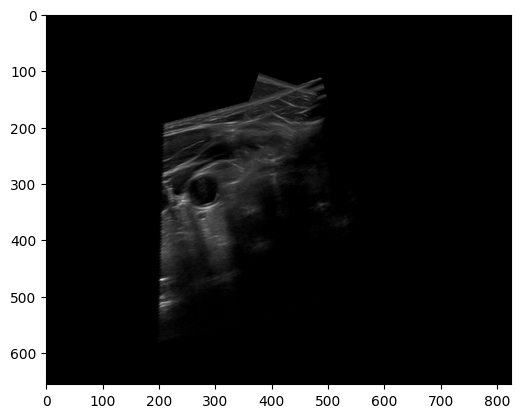

In [51]:
plt.imshow(im)

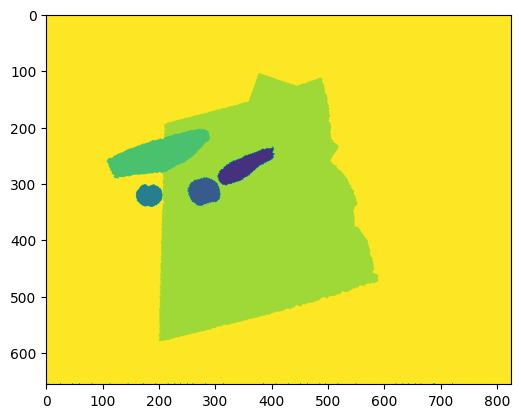

In [52]:
plt.imshow(segm)

In [53]:
im_array = np.array(im)
num_non_zero = np.count_nonzero(im_array > 0)
total_num = im_array.size
zeros = total_num - num_non_zero
ratio_nz = num_non_zero/total_num
ratio_z = zeros/total_num

In [54]:
ratio_nz

0.17231884485915078

In [ ]:
PERCENTAGE_THRESHOLD=""

In [ ]:
# delete frames that are MOSTLY black
for v_slice_file, segm_slice_file in zip(sorted(os.listdir(VOLUME_FOLDER)), sorted(os.listdir(SEGMENTATION_FOLDER))):
    v_slice_file_path = os.path.join(volume_folder, v_slice_file)
    v = np.array(Image.open(v_slice_file_path).convert('L'))
    if not np.any(v):
    # if np.unique(v) == [0]:
        # black rame detected - can delete the slice and corresponding segmentation
        os.remove(v_slice_file_path)
        assert(v_slice_file==segm_slice_file)
        s_slice_file_path = os.path.join(segm_folder, segm_slice_file)
        # os.remove(s_slice_file_path)
        # write in file which frames were deleted
        deleted_frames_file.writelines(f'deleted volume slice: {v_slice_file_path}')
        deleted_frames_file.writelines(f'deleted segm slice: {s_slice_file_path}')

deleted_frames_file.close()      

In [ ]:
``e